In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, dateutil
import matplotlib.dates as md

In [2]:
df = pd.read_csv("./../log/data.csv",header=None)
df.columns = ["Time","ESSID","MAC Address","Link Quality","Signal Level","Channel"]
# df["Time"] = pd.to_datetime(df["Time"])
df.set_index("Time",inplace=True)
df.tail()

ESSID        MAC Address  Link Quality  \
Time                                                                    
2020-08-06 19:14:46.262985  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:47.473911  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:47.473911  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:52.351748  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:52.351748  realme 6  36:8E:BD:68:7E:31            15   

                            Signal Level  Channel  
Time                                               
2020-08-06 19:14:46.262985           -94        1  
2020-08-06 19:14:47.473911           -47        6  
2020-08-06 19:14:47.473911           -94        1  
2020-08-06 19:14:52.351748           -47        6  
2020-08-06 19:14:52.351748           -95        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2020-08-06 18:50:08.320620 to 2020-08-06 19:14:52.351748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ESSID         218 non-null    object
 1   MAC Address   218 non-null    object
 2   Link Quality  218 non-null    int64 
 3   Signal Level  218 non-null    int64 
 4   Channel       218 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.2+ KB


In [4]:
df["Distance"] = np.power(10,(27.55 - (20*np.log10(2447))+np.abs(df["Signal Level"]))/20.0)
df.tail()

ESSID        MAC Address  Link Quality  \
Time                                                                    
2020-08-06 19:14:46.262985  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:47.473911  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:47.473911  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:52.351748  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:52.351748  realme 6  36:8E:BD:68:7E:31            15   

                            Signal Level  Channel    Distance  
Time                                                           
2020-08-06 19:14:46.262985           -94        1  488.501645  
2020-08-06 19:14:47.473911           -47        6    2.182057  
2020-08-06 19:14:47.473911           -94        1  488.501645  
2020-08-06 19:14:52.351748           -47        6    2.182057  
2020-08-06 19:14:52.351748           -95        1  548.107861

In [5]:
df["Distance"].groupby(df["ESSID"]).mean()

ESSID
GOMISAVI      2.313359
realme 6    451.403952
Name: Distance, dtype: float64

In [6]:
df["Power"] = np.power(10,df["Signal Level"]/10)

In [7]:
df.tail()

ESSID        MAC Address  Link Quality  \
Time                                                                    
2020-08-06 19:14:46.262985  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:47.473911  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:47.473911  realme 6  36:8E:BD:68:7E:31            16   
2020-08-06 19:14:52.351748  GOMISAVI  34:E3:80:47:F1:60            63   
2020-08-06 19:14:52.351748  realme 6  36:8E:BD:68:7E:31            15   

                            Signal Level  Channel    Distance         Power  
Time                                                                         
2020-08-06 19:14:46.262985           -94        1  488.501645  3.981072e-10  
2020-08-06 19:14:47.473911           -47        6    2.182057  1.995262e-05  
2020-08-06 19:14:47.473911           -94        1  488.501645  3.981072e-10  
2020-08-06 19:14:52.351748           -47        6    2.182057  1.995262e-05  
2020-08-06 19:14:52.351748           -95        1  548.107861  3.162278e-10

/home/gotam_dahiya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


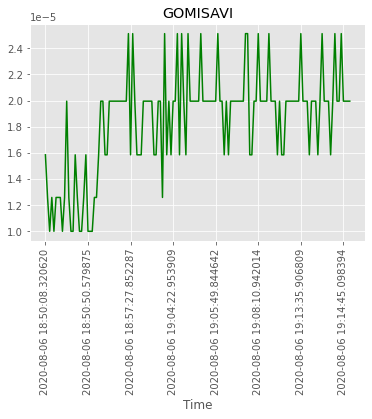

/home/gotam_dahiya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


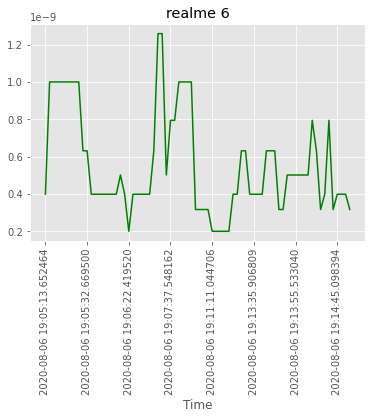

Power in milliwatts


In [9]:
for (i,ESSID) in enumerate(df["ESSID"].unique()):
    plt.style.use('ggplot')
    df["Power"][df["ESSID"]==ESSID].plot(color="g")
    plt.title(ESSID)
#     df["Signal Level"][df["ESSID"]==ESSID].plot(color="r")
    plt.xticks(rotation=90)
    plt.show();
    pass
print("Power in milliwatts")